In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
pd.set_option('display.max_columns', None)

### Part 1 

In [2]:
df_med = pd.read_csv('/Users/qinyiqiu/Desktop/longyear-obese-hypertensive-40-57-medical-SMALL-sample.csv')
df_pre = pd.read_csv('/Users/qinyiqiu/Desktop/longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv')

/var/folders/w5/hffgjjg92_7dk2x7y37qh39m0000gn/T/ipykernel_18304/67022701.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pre = pd.read_csv('/Users/qinyiqiu/Desktop/longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv')


#### Medical dataset

In [3]:
df_med.head()

,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,place_of_service,visit_type,payor,payor_channel,ref_npi,hcp_npi,hcp_taxonomy,hcp_specialty,hco_npi,hcp_npi_list,hco_npi_list,diag_list,diag_1,diag_2,diag_3,diag_4,diag_5,rev_center_code,rev_center_units,proc_code,proc_modifier,proc_units,line_charge,claim_charge,smart_allowed
0,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,home visit,inland empire health plan,managed medicaid,NaN,NaN,NaN,NaN,1.184717e+09,NaN,1184716672,I872,I872,NaN,NaN,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
1,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,home visit,inland empire health plan,managed medicaid,NaN,NaN,NaN,NaN,1.184717e+09,NaN,1184716672,I872,I872,NaN,NaN,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
2,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,outpatient visit,inland empire health plan,commercial,1.619408e+09,1.497724e+09,207R00000X - Allopathic and Osteopathic Physic...,Internal Medicine,1.396433e+09,1497723803,"1396432571,1437111028","I5020,I480,I872,L03115,L03116,M179,R7303,Z712",I5020,I480,I872,L03115,L03116,NaN,1.0,3074F,NaN,1.0,0.00,0.00,46.57
3,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,outpatient visit,inland empire health plan,commercial,1.619408e+09,1.497724e+09,207R00000X - Allopathic and Osteopathic Physic...,Internal Medicine,1.396433e+09,1497723803,"1396432571,1437111028","I5020,I480,I872,L03115,L03116,M179,R7303,Z712",I5020,I480,I872,L03115,L03116,NaN,1.0,3078F,NaN,1.0,0.00,0.00,56.38
4,00006d564a4718c744f1bbf1b6c5f8c3,42ba4419d9ad7c9293d76686fb608f10,9e4534892128401c693a6ab2ea758cd6a0a6484972168b...,da5cef18317c14180ed561a84001d8a033d724d541a2c0...,2023-08-11,CA,900.0,55.0,F,Independent Laboratory,laboratory visit,centene corporation,commercial,NaN,NaN,NaN,NaN,1.366479e+09,NaN,1366479099,N200,N200,NaN,NaN,NaN,NaN,NaN,1.0,80053,NaN,1.0,88.07,88.07,15.16


In [4]:
df_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623525 entries, 0 to 623524
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         623525 non-null  object 
 1   episode_id         623525 non-null  object 
 2   visit_id           621650 non-null  object 
 3   encounter_id       623525 non-null  object 
 4   claim_date         623525 non-null  object 
 5   patient_state      623525 non-null  object 
 6   patient_short_zip  623512 non-null  float64
 7   patient_age        616980 non-null  float64
 8   patient_gender     623525 non-null  object 
 9   place_of_service   484555 non-null  object 
 10  visit_type         600454 non-null  object 
 11  payor              608936 non-null  object 
 12  payor_channel      586086 non-null  object 
 13  ref_npi            297501 non-null  float64
 14  hcp_npi            434653 non-null  float64
 15  hcp_taxonomy       428209 non-null  object 
 16  hc

In [5]:
#check if there are repeated journey id
df_med[df_med['journey_id'] == '00006390c96ebfffed580074c35a16a7']

,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,place_of_service,visit_type,payor,payor_channel,ref_npi,hcp_npi,hcp_taxonomy,hcp_specialty,hco_npi,hcp_npi_list,hco_npi_list,diag_list,diag_1,diag_2,diag_3,diag_4,diag_5,rev_center_code,rev_center_units,proc_code,proc_modifier,proc_units,line_charge,claim_charge,smart_allowed
0,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,home visit,inland empire health plan,managed medicaid,NaN,NaN,NaN,NaN,1.184717e+09,NaN,1184716672,I872,I872,NaN,NaN,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.0,300.0,974.13
1,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,home visit,inland empire health plan,managed medicaid,NaN,NaN,NaN,NaN,1.184717e+09,NaN,1184716672,I872,I872,NaN,NaN,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.0,300.0,974.13
2,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,outpatient visit,inland empire health plan,commercial,1.619408e+09,1.497724e+09,207R00000X - Allopathic and Osteopathic Physic...,Internal Medicine,1.396433e+09,1497723803,"1396432571,1437111028","I5020,I480,I872,L03115,L03116,M179,R7303,Z712",I5020,I480,I872,L03115,L03116,NaN,1.0,3074F,NaN,1.0,0.0,0.0,46.57
3,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,outpatient visit,inland empire health plan,commercial,1.619408e+09,1.497724e+09,207R00000X - Allopathic and Osteopathic Physic...,Internal Medicine,1.396433e+09,1497723803,"1396432571,1437111028","I5020,I480,I872,L03115,L03116,M179,R7303,Z712",I5020,I480,I872,L03115,L03116,NaN,1.0,3078F,NaN,1.0,0.0,0.0,56.38


In [6]:
filtered_df_med = df_med[df_med['proc_code'] == "J3490"]
filtered_df_med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 216 to 622748
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   journey_id         772 non-null    object 
 1   episode_id         772 non-null    object 
 2   visit_id           772 non-null    object 
 3   encounter_id       772 non-null    object 
 4   claim_date         772 non-null    object 
 5   patient_state      772 non-null    object 
 6   patient_short_zip  772 non-null    float64
 7   patient_age        750 non-null    float64
 8   patient_gender     772 non-null    object 
 9   place_of_service   203 non-null    object 
 10  visit_type         752 non-null    object 
 11  payor              749 non-null    object 
 12  payor_channel      729 non-null    object 
 13  ref_npi            171 non-null    float64
 14  hcp_npi            660 non-null    float64
 15  hcp_taxonomy       658 non-null    object 
 16  hcp_specialty      65

#### Frequencies of patient state
The bar chart shows that most of the patients are in CA. From this bar chart, we reasonably believe that state may be an significant element that affects patients and obesity.

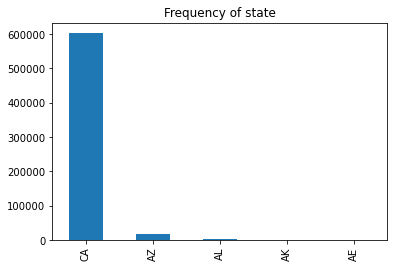

In [7]:
# frequencies of patient state
import matplotlib.pyplot as plt
state = df_med['patient_state'].value_counts()
state.plot(kind='bar')
plt.title('Frequency of state')
plt.show()

#### Histogram for patient age
For the first histogram, it shows the distribution on age ofor all patients. For the second histogram, it shows the distribution on patients who take OZP medicine. Among all patients, the distribution of age for all patients is left skewed which meansdata points being clustered towards the right side and most of the age of patients are about 60s to 70s. For patients taking the OZP medicine, the distribution on their age is much more different. We can see that there are no 50-55 year old patients taking this drug. And most of the patients who take this OZP medicin is in age 55-65. Hence we may predict that age in treatment group may bring bias in our study.

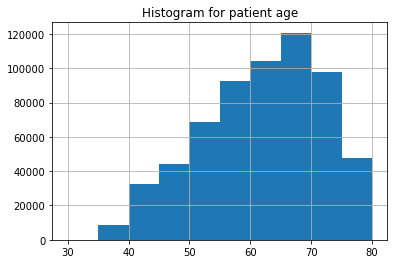

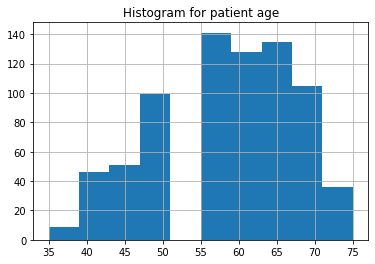

In [8]:
#histogram for patient age
import seaborn as sns
df_med['patient_age'].hist()
plt.title('Histogram for patient age')
plt.show()

filtered_df_med['patient_age'].hist()
plt.title('Histogram for patient age')
plt.show()

#### frequencies for patient gender
Below the two bar bart shows the gender of all patients in the first plot and gender for OZP user in the second plot. The gender distribution on both all patients and OZP user are similar. We will have more female patients than male patients.

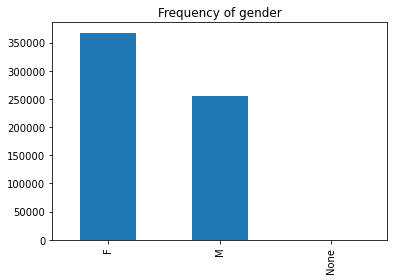

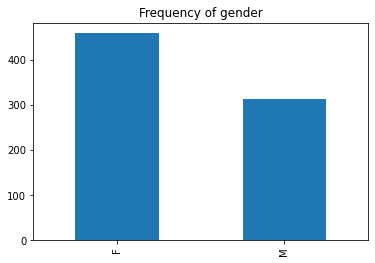

In [9]:
#frequencies for patient gender
gender = df_med['patient_gender'].value_counts()
gender.plot(kind='bar')
plt.title('Frequency of gender')
plt.show()

gender = filtered_df_med['patient_gender'].value_counts()
gender.plot(kind='bar')
plt.title('Frequency of gender')
plt.show()

#### Occurance of diagnosis
In this part, we combine all diagnosis code together first and count the frequencies of each diagnosis code and rank the frequencies to see which diseases are diagnozed most in OZP user. These diseases may have significant impact on obesity and OZP user. By matching the code to the diseases, we found the first few diseases:

I10 Essential (primary) hypertension

E11 Type 2 diabetes mellitus

E78 Disorders of lipoprotein metabolism and other lipidemias

N18 Chronic kidney disease (CKD)

I25 Chronic ischemic heart disease

M54 Dorsalgia

E66 Overweight and obesity

In [10]:
#diagnose type 
#TOP 7 OCC for OZP Users
# 1. Select 'diag_' columns
diag_med_columns = [col for col in filtered_df_med.columns if col.startswith('diag_')]
df_med_diag = filtered_df_med[diag_med_columns]

# 2. Combine values 
combined_list = df_med_diag.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

# 3. Process first three digits (same as before)
first_three_counts = {}
for diag_code in combined_list:
    first_three = diag_code[:3]
    first_three_counts[first_three] = first_three_counts.get(first_three, 0) + 1
    
import operator
# Sort the dictionary items by count (descending order)
sorted_counts = sorted(first_three_counts.items(), key=operator.itemgetter(1), reverse=True)

for items in sorted_counts:
    print(items)

('I10', 249)
('E11', 229)
('E78', 139)
('N18', 100)
('I25', 91)
('M54', 81)
('E66', 75)
('Z79', 72)
('R07', 71)
('Z51', 64)
('I48', 56)
('J45', 50)
('G89', 49)
('M19', 46)
('M25', 44)
('R10', 44)
('D68', 40)
('F41', 37)
('Z99', 36)
('K21', 35)
('H25', 34)
('Z68', 34)
('J44', 33)
('Z30', 33)
('M17', 32)
('M47', 28)
('C50', 28)
('D50', 27)
('M79', 27)
('Z87', 26)
('Z88', 25)
('N25', 25)
('R51', 24)
('G47', 23)
('E03', 23)
('M48', 22)
('F33', 22)
('R06', 20)
('R94', 20)
('Z85', 19)
('Z20', 19)
('J20', 19)
('F17', 19)
('I50', 18)
('K29', 18)
('F32', 18)
('Z86', 17)
('M51', 17)
('I12', 17)
('R11', 16)
('M70', 16)
('N20', 16)
('I11', 16)
('K57', 15)
('K44', 15)
('K59', 15)
('C61', 15)
('Z90', 15)
('N13', 15)
('I49', 14)
('Z11', 14)
('Z01', 14)
('D63', 14)
('F31', 14)
('L02', 14)
('G43', 12)
('K80', 12)
('M16', 12)
('D64', 12)
('R05', 12)
('J30', 12)
('R26', 12)
('H40', 12)
('K43', 12)
('R19', 12)
('N39', 12)
('K40', 12)
('R52', 12)
('Z95', 11)
('C77', 11)
('D25', 11)
('N95', 11)
('T85', 11)


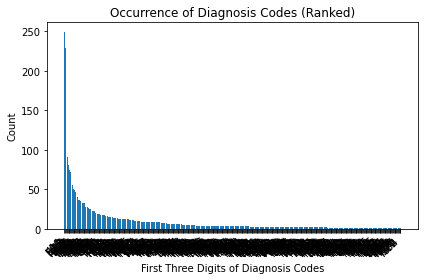

In [11]:
import matplotlib.pyplot as plt
labels = [item[0] for item in sorted_counts]
values = [item[1] for item in sorted_counts]

# Create the bar chart
plt.bar(labels,values)

# Labels and title 
plt.xlabel("First Three Digits of Diagnosis Codes")
plt.ylabel("Count")
plt.title("Occurrence of Diagnosis Codes (Ranked)")

# Optional: Rotate x labels if they are long or overlapping
if len(labels) > 5:  
    plt.xticks(rotation=45, ha='right')  

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()

#### summary table
To better discover the relationship between obesity and patient gender, we calculate the ratio on patients' gender and obesity diagnosis. In our calculationg, about 59% obesity patients among all patient are female and 41% are Male. Hence, it shows that female may have a bigger change to be diagosed as obesity.

In [12]:
df_obesity = df_med[df_med['diag_1'].str.startswith("E66")|
      df_med['diag_2'].str.startswith("E66")|
      df_med['diag_3'].str.startswith("E66")|
      df_med['diag_4'].str.startswith("E66")|
      df_med['diag_5'].str.startswith("E66")]
df_obesity['diag'] = "Obesity"
patients_gender_cnt = df_obesity.groupby(['diag', 'patient_gender'])['journey_id'].nunique().reset_index(name = 'count')
total_cnt = patients_gender_cnt.groupby('diag')['count'].transform('sum')
patients_gender_cnt['gender_ratio'] = patients_gender_cnt['count']/total_cnt
patients_gender_cnt

/var/folders/w5/hffgjjg92_7dk2x7y37qh39m0000gn/T/ipykernel_18304/4292380559.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obesity['diag'] = "Obesity"


,diag,patient_gender,count,gender_ratio
0,Obesity,F,6422,0.587127
1,Obesity,M,4514,0.412690
2,Obesity,None,2,0.000183


#### Prescription Dataset

In [13]:
df_pre.head()

,journey_id,cohort_id,claim_id,patient_gender,patient_state,patient_zip,patient_dob,pharmacy_npi,pharmacist_npi,prescriber_npi,primary_care_npi,group_id,date_of_service,date_authorized,transaction_type,date_prescription_written,ndc11,ndc11_original,number_of_refills_authorized,diagnosis_code,diagnosis_code_type,quantity_prescribed_original,quantity_dispensed,place_of_service,is_service,level_of_service,fill_number,days_supply,unit_of_measure,daw_code,prior_authorization_type_code,is_compound_drug,coupon_type,coupon_value_amount,pharmacy_submitted_cost,patient_pay,copay_coinsurance,pcn,bin,plan_pay,reject_code_1,reject_code_3,reject_code_4,reject_code_5,ndc,active,start_date,end_date
0,00006390c96ebfffed580074c35a16a7,16,60618bd8d37311da702bf9349e76f8c26d515c082e136f...,M,CA,922,1961-01-01,1215361126,None,1750479168,None,None,2022-04-15,None,PAID,2022-02-14,47335067381,00000000000,3.0,None,None,NaN,30.0,None,None,0,2.0,30.0,None,0,None,None,None,NaN,29.79,0.0,0.0,6334225,022659,NaN,None,None,None,None,47335067381,True,190001,None
1,00006390c96ebfffed580074c35a16a7,16,dbeb47defd161331e43f4e359e8d43e4ef7546ff58359b...,M,CA,922,1961-01-01,1215361126,None,1750479168,None,None,2022-03-16,None,PAID,2022-02-14,47335067381,00000000000,3.0,None,None,NaN,30.0,None,None,0,1.0,30.0,None,0,None,None,None,NaN,28.95,0.0,0.0,6334225,022659,NaN,None,None,None,None,47335067381,True,190001,None
2,00006390c96ebfffed580074c35a16a7,16,02927d081fad10afffcba79bad27f94ff52c98e968aaec...,M,CA,922,1961-01-01,1215361126,None,1750479168,None,None,2022-05-17,None,PAID,2022-02-14,47335067381,00000000000,3.0,None,None,NaN,30.0,None,None,0,3.0,30.0,None,0,None,None,None,NaN,29.99,0.0,0.0,6334225,022659,NaN,None,None,None,None,47335067381,True,190001,None
3,00006390c96ebfffed580074c35a16a7,16,a412c986e2503a5140ed1482e88b5ec50feeedaf2d89ec...,M,CA,922,1961-01-01,1215361126,None,1750479168,None,None,2022-02-15,None,PAID,2022-02-14,47335067381,00000000000,3.0,None,None,NaN,30.0,None,None,0,0.0,30.0,None,0,None,None,None,NaN,28.95,0.0,0.0,6334225,022659,NaN,None,None,None,None,47335067381,True,190001,None
4,00006390c96ebfffed580074c35a16a7,16,b65634edd78998753fe9606b142b2fff7765d6c576973c...,M,CA,922,1961-01-01,1215361126,None,1750479168,None,None,2022-02-14,None,PAID,2022-02-14,65862059805,00000000000,0.0,None,None,NaN,90.0,None,None,0,0.0,90.0,None,0,None,None,None,NaN,17.10,0.0,0.0,6334225,022659,NaN,None,None,None,None,65862059805,True,190001,None


In [14]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894623 entries, 0 to 894622
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   journey_id                     894623 non-null  object 
 1   cohort_id                      894623 non-null  int64  
 2   claim_id                       894623 non-null  object 
 3   patient_gender                 894623 non-null  object 
 4   patient_state                  894623 non-null  object 
 5   patient_zip                    894623 non-null  object 
 6   patient_dob                    894623 non-null  object 
 7   pharmacy_npi                   894623 non-null  object 
 8   pharmacist_npi                 894623 non-null  object 
 9   prescriber_npi                 894623 non-null  object 
 10  primary_care_npi               894623 non-null  object 
 11  group_id                       894623 non-null  object 
 12  date_of_service               

#### Frequencies in state
In this dataset, similar with the medical dataset, most of the patients are from CA.

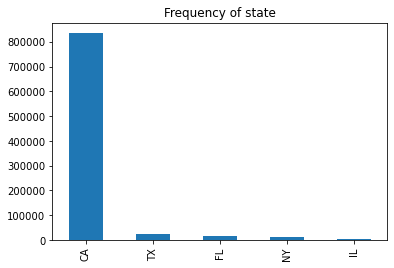

In [15]:
# frequencies of patient state
import matplotlib.pyplot as plt
state = df_pre['patient_state'].value_counts()
state.plot(kind='bar')
plt.title('Frequency of state')
plt.show()

### Part 2

In [16]:
#### Dealing with medical dataset
#### Deleting irrelevant variables: Dropping episode_id, visit_id, encounter_id, patient_short_zip, ref_npi, hcp_npi, hco_npi. As using them logically doesn't help in any part of our analysis and model development

In [17]:
df_med_v1 = df_med.drop(columns = ['episode_id','visit_id','encounter_id','patient_short_zip','ref_npi','hcp_npi','hco_npi'])

In [18]:
df_med_v1.head()

,journey_id,claim_date,patient_state,patient_age,patient_gender,place_of_service,visit_type,payor,payor_channel,hcp_taxonomy,hcp_specialty,hcp_npi_list,hco_npi_list,diag_list,diag_1,diag_2,diag_3,diag_4,diag_5,rev_center_code,rev_center_units,proc_code,proc_modifier,proc_units,line_charge,claim_charge,smart_allowed
0,00006390c96ebfffed580074c35a16a7,2020-07-13,CA,55.0,M,Home,home visit,inland empire health plan,managed medicaid,NaN,NaN,NaN,1184716672,I872,I872,NaN,NaN,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
1,00006390c96ebfffed580074c35a16a7,2020-07-13,CA,55.0,M,Home,home visit,inland empire health plan,managed medicaid,NaN,NaN,NaN,1184716672,I872,I872,NaN,NaN,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
2,00006390c96ebfffed580074c35a16a7,2023-07-19,CA,60.0,M,Office,outpatient visit,inland empire health plan,commercial,207R00000X - Allopathic and Osteopathic Physic...,Internal Medicine,1497723803,"1396432571,1437111028","I5020,I480,I872,L03115,L03116,M179,R7303,Z712",I5020,I480,I872,L03115,L03116,NaN,1.0,3074F,NaN,1.0,0.00,0.00,46.57
3,00006390c96ebfffed580074c35a16a7,2023-07-19,CA,60.0,M,Office,outpatient visit,inland empire health plan,commercial,207R00000X - Allopathic and Osteopathic Physic...,Internal Medicine,1497723803,"1396432571,1437111028","I5020,I480,I872,L03115,L03116,M179,R7303,Z712",I5020,I480,I872,L03115,L03116,NaN,1.0,3078F,NaN,1.0,0.00,0.00,56.38
4,00006d564a4718c744f1bbf1b6c5f8c3,2023-08-11,CA,55.0,F,Independent Laboratory,laboratory visit,centene corporation,commercial,NaN,NaN,NaN,1366479099,N200,N200,NaN,NaN,NaN,NaN,NaN,1.0,80053,NaN,1.0,88.07,88.07,15.16


In [19]:
#checking all unique values for all categorical variables
list_columns_med = list(df_med_v1.columns)
for i in list_columns_med:
    x = len(df_med_v1[i].unique())
    print('Unique values for column ' + i + ':', x)

Unique values for column journey_id: 27377
Unique values for column claim_date: 664
Unique values for column patient_state: 5
Unique values for column patient_age: 12
Unique values for column patient_gender: 3
Unique values for column place_of_service: 32
Unique values for column visit_type: 9
Unique values for column payor: 190
Unique values for column payor_channel: 9
Unique values for column hcp_taxonomy: 340
Unique values for column hcp_specialty: 192
Unique values for column hcp_npi_list: 32739
Unique values for column hco_npi_list: 16893
Unique values for column diag_list: 150711
Unique values for column diag_1: 8669
Unique values for column diag_2: 7432
Unique values for column diag_3: 6197
Unique values for column diag_4: 5324
Unique values for column diag_5: 4149
Unique values for column rev_center_code: 270
Unique values for column rev_center_units: 64
Unique values for column proc_code: 6348
Unique values for column proc_modifier: 300
Unique values for column proc_units: 617

#### Dropping payor, hcp_taxonomy, hcp_specialty, hcp_npi_list, hco_npi_list, diag_list, diag_1, diag_2, diag_3, diag_4, diag_5, rev_center_code, rev_center_units, proc_modifier, as they are categorical and have higher number of unique values

In [20]:
df_med_v2 = df_med_v1.drop(columns = ['payor', 'hcp_taxonomy', 'hcp_specialty', 'hcp_npi_list', 'hco_npi_list','diag_list', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5', 'rev_center_code', 'rev_center_units', 'proc_modifier'])

In [21]:
df_med_v2.head()

,journey_id,claim_date,patient_state,patient_age,patient_gender,place_of_service,visit_type,payor_channel,proc_code,proc_units,line_charge,claim_charge,smart_allowed
0,00006390c96ebfffed580074c35a16a7,2020-07-13,CA,55.0,M,Home,home visit,managed medicaid,A6549,2.0,300.00,300.00,974.13
1,00006390c96ebfffed580074c35a16a7,2020-07-13,CA,55.0,M,Home,home visit,managed medicaid,A6549,2.0,300.00,300.00,974.13
2,00006390c96ebfffed580074c35a16a7,2023-07-19,CA,60.0,M,Office,outpatient visit,commercial,3074F,1.0,0.00,0.00,46.57
3,00006390c96ebfffed580074c35a16a7,2023-07-19,CA,60.0,M,Office,outpatient visit,commercial,3078F,1.0,0.00,0.00,56.38
4,00006d564a4718c744f1bbf1b6c5f8c3,2023-08-11,CA,55.0,F,Independent Laboratory,laboratory visit,commercial,80053,1.0,88.07,88.07,15.16


In [22]:
#change date time 
df_med_v2['claim_date'] = pd.to_datetime(df_med_v2['claim_date'])
#df_med_v2.info()

In [23]:
df_med_v2.sort_values(by = ['journey_id','claim_date'], inplace = True)

#### Check missing values for each variables and deal with them 

In [24]:
df_med_v2.isnull().sum()

journey_id               0
claim_date               0
patient_state            0
patient_age           6545
patient_gender           0
place_of_service    138970
visit_type           23071
payor_channel        37439
proc_code            23913
proc_units            2194
line_charge              0
claim_charge             0
smart_allowed            0
dtype: int64

In [25]:
df_med_v3 = df_med_v2.dropna(subset = ['patient_age','patient_gender','visit_type','payor_channel','proc_code','proc_units'])

In [26]:
df_med_v3.isnull().sum()

journey_id              0
claim_date              0
patient_state           0
patient_age             0
patient_gender          0
place_of_service    92655
visit_type              0
payor_channel           0
proc_code               0
proc_units              0
line_charge             0
claim_charge            0
smart_allowed           0
dtype: int64

In [27]:
place_of_service_list = list(df_med_v3['place_of_service'].unique())

In [28]:
df_med_v3['place_of_service'] = df_med_v3['place_of_service'].apply(lambda x: np.random.choice(place_of_service_list) if pd.isnull(x) else x)

/var/folders/w5/hffgjjg92_7dk2x7y37qh39m0000gn/T/ipykernel_18304/3203950801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_med_v3['place_of_service'] = df_med_v3['place_of_service'].apply(lambda x: np.random.choice(place_of_service_list) if pd.isnull(x) else x)


In [29]:
# check the missing value for dataset
#df_med_v3.info()
#df_med_v3.isnull().sum()
df_med_v3.head()

,journey_id,claim_date,patient_state,patient_age,patient_gender,place_of_service,visit_type,payor_channel,proc_code,proc_units,line_charge,claim_charge,smart_allowed
0,00006390c96ebfffed580074c35a16a7,2020-07-13,CA,55.0,M,Home,home visit,managed medicaid,A6549,2.0,300.0,300.0,974.13
1,00006390c96ebfffed580074c35a16a7,2020-07-13,CA,55.0,M,Home,home visit,managed medicaid,A6549,2.0,300.0,300.0,974.13
2,00006390c96ebfffed580074c35a16a7,2023-07-19,CA,60.0,M,Office,outpatient visit,commercial,3074F,1.0,0.0,0.0,46.57
3,00006390c96ebfffed580074c35a16a7,2023-07-19,CA,60.0,M,Office,outpatient visit,commercial,3078F,1.0,0.0,0.0,56.38
5,00006d564a4718c744f1bbf1b6c5f8c3,2019-11-01,CA,50.0,F,Office,outpatient visit,commercial,72072,1.0,107.0,107.0,72.42


In [30]:
df_med_v3['place_of_service'].nunique()

32

#### Dealing with place_of _service_group
We found that there 32 categories in this variable, in order to reduce the complexity of our following model, we decided to reduce the categories into 12 different categories group. We merge places which have frequencies less than 5000 as other groups and retain the rest of theses categories same. Finally, we will have totally 12 categories including Independent Clinic, Ambulatory Surgical Center, Urgent Care Facility, Ambulance - Land, Federally Qualified Health Center, Home, Emergency Room - Hospital, On Campus-Outpatient Hospital, Inpatient Hospital, Independent Laboratory, Office, and Other.

In [31]:
df_med_v3_place_pivot = pd.pivot_table(df_med_v3, index = 'place_of_service',values = 'journey_id',aggfunc = len)
df_med_v3_place_pivot.reset_index(inplace = True)
df_med_v3_place_pivot.sort_values('journey_id', inplace = True)
df_med_v3_place_pivot['place_of_service_group'] = np.where(df_med_v3_place_pivot['journey_id']<5000, 'Other',df_med_v3_place_pivot['place_of_service'])
df_med_v3_place_pivot

,place_of_service,journey_id,place_of_service_group
31,nan,2803,Other
26,Public Health Clinic,2831,Other
10,Group Home,2836,Other
12,Hospice,2864,Other
24,Place of Employment/Worksite,2884,Other
3,Birthing Center,2910,Other
0,Ambulance - Air or Water,2919,Other
18,Non-residential Substance Abuse Treatment Faci...,2950,Other
6,Comprehensive Outpatient Rehabilitation Facility,3001,Other
5,Comprehensive Inpatient Rehabilitation Facility,3007,Other


In [32]:
df_med_v3 = pd.merge(df_med_v3, df_med_v3_place_pivot[['place_of_service','place_of_service_group']], on = 'place_of_service', how = 'inner')

In [33]:
df_med_v3.head()

,journey_id,claim_date,patient_state,patient_age,patient_gender,place_of_service,visit_type,payor_channel,proc_code,proc_units,line_charge,claim_charge,smart_allowed,place_of_service_group
0,00006390c96ebfffed580074c35a16a7,2020-07-13,CA,55.0,M,Home,home visit,managed medicaid,A6549,2.0,300.00,300.00,974.13,Home
1,00006390c96ebfffed580074c35a16a7,2020-07-13,CA,55.0,M,Home,home visit,managed medicaid,A6549,2.0,300.00,300.00,974.13,Home
2,00011020325337a2a22fb26b6492196a,2020-08-21,CA,70.0,M,Home,home visit,commercial,A7035,1.0,97.80,97.80,42.18,Home
3,00068c10159e81c6a358f7ce06eb6af8,2019-02-18,CA,55.0,M,Home,outpatient visit,commercial,86900,1.0,4.48,4.48,218.94,Home
4,0006cee5adc49df3f03e8bf9a3975850,2019-02-06,CA,55.0,F,Home,home visit,commercial,A7034,1.0,250.00,250.00,41.57,Home


In [34]:
df_med_v3.drop(columns = 'place_of_service',inplace = True)

In [35]:
df_med_v3['place_of_service_group'].unique()

array(['Home', 'Office', 'Independent Laboratory',
       'Ambulatory Surgical Center', 'On Campus-Outpatient Hospital',
       'Other', 'Emergency Room - Hospital',
       'Federally Qualified Health Center', 'Ambulance - Land',
       'Urgent Care Facility', 'Independent Clinic', 'Inpatient Hospital'],
      dtype=object)

#### Dealing with categorical variables: change all our cetagorical variables into dummies variables.

In [36]:
df_med_v4 = pd.get_dummies(df_med_v3, columns = ['patient_state','patient_gender', 
                                                 'visit_type','payor_channel','place_of_service_group'])

In [37]:
df_med_v4.head()

,journey_id,claim_date,patient_age,proc_code,proc_units,line_charge,claim_charge,smart_allowed,patient_state_AE,patient_state_AK,patient_state_AL,patient_state_AZ,patient_state_CA,patient_gender_F,patient_gender_M,visit_type_ambulance visit,visit_type_emergency room visit,visit_type_home visit,visit_type_inpatient visit,visit_type_laboratory visit,visit_type_non-hospital institution visit,visit_type_outpatient visit,visit_type_pharmacy visit,payor_channel_commercial,payor_channel_managed medicaid,payor_channel_medicaid,payor_channel_medicare,payor_channel_medicare advantage,payor_channel_tricare,payor_channel_veterans affairs,payor_channel_workers comp,place_of_service_group_Ambulance - Land,place_of_service_group_Ambulatory Surgical Center,place_of_service_group_Emergency Room - Hospital,place_of_service_group_Federally Qualified Health Center,place_of_service_group_Home,place_of_service_group_Independent Clinic,place_of_service_group_Independent Laboratory,place_of_service_group_Inpatient Hospital,place_of_service_group_Office,place_of_service_group_On Campus-Outpatient Hospital,place_of_service_group_Other,place_of_service_group_Urgent Care Facility
0,00006390c96ebfffed580074c35a16a7,2020-07-13,55.0,A6549,2.0,300.00,300.00,974.13,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,00006390c96ebfffed580074c35a16a7,2020-07-13,55.0,A6549,2.0,300.00,300.00,974.13,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,00011020325337a2a22fb26b6492196a,2020-08-21,70.0,A7035,1.0,97.80,97.80,42.18,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,00068c10159e81c6a358f7ce06eb6af8,2019-02-18,55.0,86900,1.0,4.48,4.48,218.94,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0006cee5adc49df3f03e8bf9a3975850,2019-02-06,55.0,A7034,1.0,250.00,250.00,41.57,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [38]:
df_med_v4.columns

Index(['journey_id', 'claim_date', 'patient_age', 'proc_code', 'proc_units',
       'line_charge', 'claim_charge', 'smart_allowed', 'patient_state_AE',
       'patient_state_AK', 'patient_state_AL', 'patient_state_AZ',
       'patient_state_CA', 'patient_gender_F', 'patient_gender_M',
       'visit_type_ambulance visit', 'visit_type_emergency room visit',
       'visit_type_home visit', 'visit_type_inpatient visit',
       'visit_type_laboratory visit',
       'visit_type_non-hospital institution visit',
       'visit_type_outpatient visit', 'visit_type_pharmacy visit',
       'payor_channel_commercial', 'payor_channel_managed medicaid',
       'payor_channel_medicaid', 'payor_channel_medicare',
       'payor_channel_medicare advantage', 'payor_channel_tricare',
       'payor_channel_veterans affairs', 'payor_channel_workers comp',
       'place_of_service_group_Ambulance - Land',
       'place_of_service_group_Ambulatory Surgical Center',
       'place_of_service_group_Emergency Room 

#### In order to better see a summary view where each journey_id is associated with the number of claims (claim_date count) and the average values of patient_age, proc_units, line_charge, claim_charge, and smart_allowed

In [39]:
df_med_v4_pivot1 = pd.pivot_table(df_med_v4, index = 'journey_id', values = ['claim_date', 'patient_age', 'proc_units',
       'line_charge', 'claim_charge', 'smart_allowed',] , aggfunc = {'claim_date':len, 'patient_age':np.mean,'proc_units':np.mean,'line_charge':np.mean,'claim_charge':np.mean, 'smart_allowed':np.mean})
df_med_v4_pivot1

,claim_charge,claim_date,line_charge,patient_age,proc_units,smart_allowed
journey_id,,,,,,
00006390c96ebfffed580074c35a16a7,150.000000,4,150.000000,57.500000,1.500000,512.802500
00006d564a4718c744f1bbf1b6c5f8c3,864.875000,18,864.875000,50.555556,1.000000,180.650556
000072bc05e31d0126475c7a3e771af1,145.000000,2,145.000000,55.000000,1.000000,85.380000
00011020325337a2a22fb26b6492196a,158.607805,41,158.607805,73.414634,1.000000,95.104146
00025243850b83969606f3f2aafc2d99,91.598000,5,91.598000,70.000000,1.000000,83.376000
...,...,...,...,...,...,...
1ffe5727cd1220481c5c2649e5e5a027,1550.819231,13,1550.819231,65.000000,1.000000,137.652308
1fff19f39322d5c25a60259f30d937a4,61.640000,3,61.640000,55.000000,1.000000,200.926667
1fff36b69093f3ece1c2426183acaf31,640.620945,127,640.620945,66.417323,1.047244,153.467323


In [40]:
df_med_v4_pivot1.rename(columns = {'claim_date':'number_of_claims'},inplace = True)

In [41]:
df_med_v4_pivot2 = pd.pivot_table(df_med_v4, index = 'journey_id',values = ['patient_state_AK',
       'patient_state_AL', 'patient_state_AZ', 'patient_state_CA',
       'patient_gender_F', 'patient_gender_M', 'visit_type_ambulance visit',
       'visit_type_emergency room visit', 'visit_type_home visit',
       'visit_type_inpatient visit', 'visit_type_laboratory visit',
       'visit_type_non-hospital institution visit',
       'visit_type_outpatient visit', 'visit_type_pharmacy visit',
       'payor_channel_commercial', 'payor_channel_managed medicaid',
       'payor_channel_medicaid', 'payor_channel_medicare',
       'payor_channel_medicare advantage', 'payor_channel_tricare',
       'payor_channel_veterans affairs', 'payor_channel_workers comp',
       'place_of_service_group_Emergency Room - Hospital',
       'place_of_service_group_Federally Qualified Health Center',
       'place_of_service_group_Home',
       'place_of_service_group_Independent Laboratory',
       'place_of_service_group_Inpatient Hospital',
       'place_of_service_group_Office',
       'place_of_service_group_On Campus-Outpatient Hospital',
       'place_of_service_group_Other'], aggfunc = np.sum)

In [42]:
df_med_v4_final_pivot = pd.merge(df_med_v4_pivot1, df_med_v4_pivot2, on = 'journey_id', how = 'inner')
df_med_v4_final_pivot.reset_index(inplace = True)

In [43]:
df_med_v4_final_pivot.head()

,journey_id,claim_charge,number_of_claims,line_charge,patient_age,proc_units,smart_allowed,patient_gender_F,patient_gender_M,patient_state_AK,patient_state_AL,patient_state_AZ,patient_state_CA,payor_channel_commercial,payor_channel_managed medicaid,payor_channel_medicaid,payor_channel_medicare,payor_channel_medicare advantage,payor_channel_tricare,payor_channel_veterans affairs,payor_channel_workers comp,place_of_service_group_Emergency Room - Hospital,place_of_service_group_Federally Qualified Health Center,place_of_service_group_Home,place_of_service_group_Independent Laboratory,place_of_service_group_Inpatient Hospital,place_of_service_group_Office,place_of_service_group_On Campus-Outpatient Hospital,place_of_service_group_Other,visit_type_ambulance visit,visit_type_emergency room visit,visit_type_home visit,visit_type_inpatient visit,visit_type_laboratory visit,visit_type_non-hospital institution visit,visit_type_outpatient visit,visit_type_pharmacy visit
0,00006390c96ebfffed580074c35a16a7,150.000000,4,150.000000,57.500000,1.5,512.802500,0.0,4.0,0,0,0.0,4.0,2.0,2.0,0,0.0,0.0,0,0,0,0,0,2,0,0,2.0,0,0.0,0.0,0,2,0,0.0,0.0,2.0,0
1,00006d564a4718c744f1bbf1b6c5f8c3,864.875000,18,864.875000,50.555556,1.0,180.650556,18.0,0.0,0,0,0.0,18.0,18.0,0.0,0,0.0,0.0,0,0,0,0,0,0,4,0,11.0,1,1.0,0.0,0,0,0,4.0,0.0,14.0,0
2,000072bc05e31d0126475c7a3e771af1,145.000000,2,145.000000,55.000000,1.0,85.380000,0.0,2.0,0,0,0.0,2.0,2.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,2.0,0,0.0,0.0,0,0,0,0.0,0.0,2.0,0
3,00011020325337a2a22fb26b6492196a,158.607805,41,158.607805,73.414634,1.0,95.104146,0.0,41.0,0,0,0.0,41.0,41.0,0.0,0,0.0,0.0,0,0,0,0,0,1,5,0,35.0,0,0.0,0.0,0,1,0,5.0,0.0,35.0,0
4,00025243850b83969606f3f2aafc2d99,91.598000,5,91.598000,70.000000,1.0,83.376000,5.0,0.0,0,0,0.0,5.0,0.0,0.0,0,0.0,5.0,0,0,0,1,0,0,3,0,1.0,0,0.0,0.0,0,0,0,3.0,0.0,2.0,0


In [44]:
dummies_list = ['patient_state_AK',
       'patient_state_AL', 'patient_state_AZ', 'patient_state_CA',
       'patient_gender_F', 'patient_gender_M', 'visit_type_ambulance visit',
       'visit_type_emergency room visit', 'visit_type_home visit',
       'visit_type_inpatient visit', 'visit_type_laboratory visit',
       'visit_type_non-hospital institution visit',
       'visit_type_outpatient visit', 'visit_type_pharmacy visit',
       'payor_channel_commercial', 'payor_channel_managed medicaid',
       'payor_channel_medicaid', 'payor_channel_medicare',
       'payor_channel_medicare advantage', 'payor_channel_tricare',
       'payor_channel_veterans affairs', 'payor_channel_workers comp',
       'place_of_service_group_Emergency Room - Hospital',
       'place_of_service_group_Federally Qualified Health Center',
       'place_of_service_group_Home',
       'place_of_service_group_Independent Laboratory',
       'place_of_service_group_Inpatient Hospital',
       'place_of_service_group_Office',
       'place_of_service_group_On Campus-Outpatient Hospital',
       'place_of_service_group_Other']

for i in dummies_list:
    df_med_v4_final_pivot[i] = np.where(df_med_v4_final_pivot[i] > 0, 1, 0)

In [45]:
df_med_v4_final_pivot.head()

,journey_id,claim_charge,number_of_claims,line_charge,patient_age,proc_units,smart_allowed,patient_gender_F,patient_gender_M,patient_state_AK,patient_state_AL,patient_state_AZ,patient_state_CA,payor_channel_commercial,payor_channel_managed medicaid,payor_channel_medicaid,payor_channel_medicare,payor_channel_medicare advantage,payor_channel_tricare,payor_channel_veterans affairs,payor_channel_workers comp,place_of_service_group_Emergency Room - Hospital,place_of_service_group_Federally Qualified Health Center,place_of_service_group_Home,place_of_service_group_Independent Laboratory,place_of_service_group_Inpatient Hospital,place_of_service_group_Office,place_of_service_group_On Campus-Outpatient Hospital,place_of_service_group_Other,visit_type_ambulance visit,visit_type_emergency room visit,visit_type_home visit,visit_type_inpatient visit,visit_type_laboratory visit,visit_type_non-hospital institution visit,visit_type_outpatient visit,visit_type_pharmacy visit
0,00006390c96ebfffed580074c35a16a7,150.000000,4,150.000000,57.500000,1.5,512.802500,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
1,00006d564a4718c744f1bbf1b6c5f8c3,864.875000,18,864.875000,50.555556,1.0,180.650556,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,0
2,000072bc05e31d0126475c7a3e771af1,145.000000,2,145.000000,55.000000,1.0,85.380000,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,00011020325337a2a22fb26b6492196a,158.607805,41,158.607805,73.414634,1.0,95.104146,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0
4,00025243850b83969606f3f2aafc2d99,91.598000,5,91.598000,70.000000,1.0,83.376000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0


In [46]:
#filter out the OZP user
ozempic_patients = list(df_med_v3['journey_id'][df_med_v3['proc_code'] == 'J3490'].unique())

In [47]:
df_med_v4_final_pivot['Treatment_variable'] = np.where(df_med_v4_final_pivot['journey_id'].isin(ozempic_patients),1,0)
df_med_v4_final_pivot

,journey_id,claim_charge,number_of_claims,line_charge,patient_age,proc_units,smart_allowed,patient_gender_F,patient_gender_M,patient_state_AK,patient_state_AL,patient_state_AZ,patient_state_CA,payor_channel_commercial,payor_channel_managed medicaid,payor_channel_medicaid,payor_channel_medicare,payor_channel_medicare advantage,payor_channel_tricare,payor_channel_veterans affairs,payor_channel_workers comp,place_of_service_group_Emergency Room - Hospital,place_of_service_group_Federally Qualified Health Center,place_of_service_group_Home,place_of_service_group_Independent Laboratory,place_of_service_group_Inpatient Hospital,place_of_service_group_Office,place_of_service_group_On Campus-Outpatient Hospital,place_of_service_group_Other,visit_type_ambulance visit,visit_type_emergency room visit,visit_type_home visit,visit_type_inpatient visit,visit_type_laboratory visit,visit_type_non-hospital institution visit,visit_type_outpatient visit,visit_type_pharmacy visit,Treatment_variable
0,00006390c96ebfffed580074c35a16a7,150.000000,4,150.000000,57.500000,1.500000,512.802500,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,00006d564a4718c744f1bbf1b6c5f8c3,864.875000,18,864.875000,50.555556,1.000000,180.650556,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0
2,000072bc05e31d0126475c7a3e771af1,145.000000,2,145.000000,55.000000,1.000000,85.380000,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,00011020325337a2a22fb26b6492196a,158.607805,41,158.607805,73.414634,1.000000,95.104146,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0
4,00025243850b83969606f3f2aafc2d99,91.598000,5,91.598000,70.000000,1.000000,83.376000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26294,1ffe5727cd1220481c5c2649e5e5a027,1550.819231,13,1550.819231,65.000000,1.000000,137.652308,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
26295,1fff19f39322d5c25a60259f30d937a4,61.640000,3,61.640000,55.000000,1.000000,200.926667,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
26296,1fff36b69093f3ece1c2426183acaf31,640.620945,127,640.620945,66.417323,1.047244,153.467323,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1,1,1,0,0,0,1,1,0,1,0,0
26297,1fffbb8b7e6a6c38cf97dafe3c5bc1cc,223.000000,5,223.000000,46.000000,1.000000,68.732000,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [48]:
df_med_v4_final_pivot.head()

,journey_id,claim_charge,number_of_claims,line_charge,patient_age,proc_units,smart_allowed,patient_gender_F,patient_gender_M,patient_state_AK,patient_state_AL,patient_state_AZ,patient_state_CA,payor_channel_commercial,payor_channel_managed medicaid,payor_channel_medicaid,payor_channel_medicare,payor_channel_medicare advantage,payor_channel_tricare,payor_channel_veterans affairs,payor_channel_workers comp,place_of_service_group_Emergency Room - Hospital,place_of_service_group_Federally Qualified Health Center,place_of_service_group_Home,place_of_service_group_Independent Laboratory,place_of_service_group_Inpatient Hospital,place_of_service_group_Office,place_of_service_group_On Campus-Outpatient Hospital,place_of_service_group_Other,visit_type_ambulance visit,visit_type_emergency room visit,visit_type_home visit,visit_type_inpatient visit,visit_type_laboratory visit,visit_type_non-hospital institution visit,visit_type_outpatient visit,visit_type_pharmacy visit,Treatment_variable
0,00006390c96ebfffed580074c35a16a7,150.000000,4,150.000000,57.500000,1.5,512.802500,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,00006d564a4718c744f1bbf1b6c5f8c3,864.875000,18,864.875000,50.555556,1.0,180.650556,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0
2,000072bc05e31d0126475c7a3e771af1,145.000000,2,145.000000,55.000000,1.0,85.380000,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,00011020325337a2a22fb26b6492196a,158.607805,41,158.607805,73.414634,1.0,95.104146,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0
4,00025243850b83969606f3f2aafc2d99,91.598000,5,91.598000,70.000000,1.0,83.376000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0


In [49]:
len(df_med_v4_final_pivot['journey_id'].unique())

26299

#### Dealing with Prescription dataset

In [50]:
df_pre.head()

,journey_id,cohort_id,claim_id,patient_gender,patient_state,patient_zip,patient_dob,pharmacy_npi,pharmacist_npi,prescriber_npi,primary_care_npi,group_id,date_of_service,date_authorized,transaction_type,date_prescription_written,ndc11,ndc11_original,number_of_refills_authorized,diagnosis_code,diagnosis_code_type,quantity_prescribed_original,quantity_dispensed,place_of_service,is_service,level_of_service,fill_number,days_supply,unit_of_measure,daw_code,prior_authorization_type_code,is_compound_drug,coupon_type,coupon_value_amount,pharmacy_submitted_cost,patient_pay,copay_coinsurance,pcn,bin,plan_pay,reject_code_1,reject_code_3,reject_code_4,reject_code_5,ndc,active,start_date,end_date
0,00006390c96ebfffed580074c35a16a7,16,60618bd8d37311da702bf9349e76f8c26d515c082e136f...,M,CA,922,1961-01-01,1215361126,None,1750479168,None,None,2022-04-15,None,PAID,2022-02-14,47335067381,00000000000,3.0,None,None,NaN,30.0,None,None,0,2.0,30.0,None,0,None,None,None,NaN,29.79,0.0,0.0,6334225,022659,NaN,None,None,None,None,47335067381,True,190001,None
1,00006390c96ebfffed580074c35a16a7,16,dbeb47defd161331e43f4e359e8d43e4ef7546ff58359b...,M,CA,922,1961-01-01,1215361126,None,1750479168,None,None,2022-03-16,None,PAID,2022-02-14,47335067381,00000000000,3.0,None,None,NaN,30.0,None,None,0,1.0,30.0,None,0,None,None,None,NaN,28.95,0.0,0.0,6334225,022659,NaN,None,None,None,None,47335067381,True,190001,None
2,00006390c96ebfffed580074c35a16a7,16,02927d081fad10afffcba79bad27f94ff52c98e968aaec...,M,CA,922,1961-01-01,1215361126,None,1750479168,None,None,2022-05-17,None,PAID,2022-02-14,47335067381,00000000000,3.0,None,None,NaN,30.0,None,None,0,3.0,30.0,None,0,None,None,None,NaN,29.99,0.0,0.0,6334225,022659,NaN,None,None,None,None,47335067381,True,190001,None
3,00006390c96ebfffed580074c35a16a7,16,a412c986e2503a5140ed1482e88b5ec50feeedaf2d89ec...,M,CA,922,1961-01-01,1215361126,None,1750479168,None,None,2022-02-15,None,PAID,2022-02-14,47335067381,00000000000,3.0,None,None,NaN,30.0,None,None,0,0.0,30.0,None,0,None,None,None,NaN,28.95,0.0,0.0,6334225,022659,NaN,None,None,None,None,47335067381,True,190001,None
4,00006390c96ebfffed580074c35a16a7,16,b65634edd78998753fe9606b142b2fff7765d6c576973c...,M,CA,922,1961-01-01,1215361126,None,1750479168,None,None,2022-02-14,None,PAID,2022-02-14,65862059805,00000000000,0.0,None,None,NaN,90.0,None,None,0,0.0,90.0,None,0,None,None,None,NaN,17.10,0.0,0.0,6334225,022659,NaN,None,None,None,None,65862059805,True,190001,None


#### Dropping claim_id, patient_state, patient_zip, pharmacy_npi, pharmacist_npi, prescriber_npi, primary_care_npi, As using them logically doesn't help in any part of our analysis and model development

##### Dropping columns patient gender, patient_state and patient_dob as they are already present in the medical dataset

In [51]:
df_pre_v1 = df_pre.drop(columns = ['claim_id','patient_gender', 'patient_state','patient_dob','patient_zip','pharmacy_npi','pharmacist_npi','prescriber_npi','primary_care_npi'])

In [52]:
df_pre_v1.head()

,journey_id,cohort_id,group_id,date_of_service,date_authorized,transaction_type,date_prescription_written,ndc11,ndc11_original,number_of_refills_authorized,diagnosis_code,diagnosis_code_type,quantity_prescribed_original,quantity_dispensed,place_of_service,is_service,level_of_service,fill_number,days_supply,unit_of_measure,daw_code,prior_authorization_type_code,is_compound_drug,coupon_type,coupon_value_amount,pharmacy_submitted_cost,patient_pay,copay_coinsurance,pcn,bin,plan_pay,reject_code_1,reject_code_3,reject_code_4,reject_code_5,ndc,active,start_date,end_date
0,00006390c96ebfffed580074c35a16a7,16,None,2022-04-15,None,PAID,2022-02-14,47335067381,00000000000,3.0,None,None,NaN,30.0,None,None,0,2.0,30.0,None,0,None,None,None,NaN,29.79,0.0,0.0,6334225,022659,NaN,None,None,None,None,47335067381,True,190001,None
1,00006390c96ebfffed580074c35a16a7,16,None,2022-03-16,None,PAID,2022-02-14,47335067381,00000000000,3.0,None,None,NaN,30.0,None,None,0,1.0,30.0,None,0,None,None,None,NaN,28.95,0.0,0.0,6334225,022659,NaN,None,None,None,None,47335067381,True,190001,None
2,00006390c96ebfffed580074c35a16a7,16,None,2022-05-17,None,PAID,2022-02-14,47335067381,00000000000,3.0,None,None,NaN,30.0,None,None,0,3.0,30.0,None,0,None,None,None,NaN,29.99,0.0,0.0,6334225,022659,NaN,None,None,None,None,47335067381,True,190001,None
3,00006390c96ebfffed580074c35a16a7,16,None,2022-02-15,None,PAID,2022-02-14,47335067381,00000000000,3.0,None,None,NaN,30.0,None,None,0,0.0,30.0,None,0,None,None,None,NaN,28.95,0.0,0.0,6334225,022659,NaN,None,None,None,None,47335067381,True,190001,None
4,00006390c96ebfffed580074c35a16a7,16,None,2022-02-14,None,PAID,2022-02-14,65862059805,00000000000,0.0,None,None,NaN,90.0,None,None,0,0.0,90.0,None,0,None,None,None,NaN,17.10,0.0,0.0,6334225,022659,NaN,None,None,None,None,65862059805,True,190001,None


In [53]:
list_columns_pre = list(df_pre_v1.columns)

In [54]:
for i in list_columns_pre:
    x = len(df_pre_v1[i].unique())
    print('Unique values for column ' + i + ':', x)

Unique values for column journey_id: 14832
Unique values for column cohort_id: 2
Unique values for column group_id: 2049
Unique values for column date_of_service: 590
Unique values for column date_authorized: 586
Unique values for column transaction_type: 3
Unique values for column date_prescription_written: 588
Unique values for column ndc11: 16227
Unique values for column ndc11_original: 4671
Unique values for column number_of_refills_authorized: 73
Unique values for column diagnosis_code: 2720
Unique values for column diagnosis_code_type: 3
Unique values for column quantity_prescribed_original: 217
Unique values for column quantity_dispensed: 579
Unique values for column place_of_service: 8
Unique values for column is_service: 3
Unique values for column level_of_service: 7
Unique values for column fill_number: 30
Unique values for column days_supply: 215
Unique values for column unit_of_measure: 6
Unique values for column daw_code: 14
Unique values for column prior_authorization_typ

#### Dropping columns group_id, ndc11, ndc11_original, diagnosis_code, pcn, bin, reject_code_1,reject_code_3,reject_code_4,reject_code_5,ndc, date_authorized, date_of_service,start_date,end_date,date_prescription_written, As they are categorical and have high number of unique values

In [55]:
df_pre_v1.drop(columns = ['group_id', 'ndc11', 'ndc11_original', 'diagnosis_code', 'pcn', 'bin', 'reject_code_1','reject_code_3','reject_code_4','reject_code_5','ndc','date_authorized','date_of_service','start_date','end_date','date_prescription_written'], inplace = True)

In [56]:
df_pre_v1.isnull().sum()

journey_id                            0
cohort_id                             0
transaction_type                      0
number_of_refills_authorized      45104
diagnosis_code_type                   0
quantity_prescribed_original     572275
quantity_dispensed                    7
place_of_service                      0
is_service                            0
level_of_service                      0
fill_number                           0
days_supply                           0
unit_of_measure                    4229
daw_code                         663442
prior_authorization_type_code    275480
is_compound_drug                      0
coupon_type                           0
coupon_value_amount              894618
pharmacy_submitted_cost          109542
patient_pay                      292803
copay_coinsurance                483240
plan_pay                         402745
active                                0
dtype: int64

#### Dropping diagnosis_code_type, quantity_prescribed_original, place_of_service, level_of_service, daw_code, 'coupon_type', 'coupon_value_amount', 'copay_coinsurance', 'plan_pay', 'end_date', 'unit_of_measure','patient_pay', As they have high number of null values

In [57]:
df_pre_v1.drop(columns = ['diagnosis_code_type', 'quantity_prescribed_original','place_of_service','level_of_service','daw_code','prior_authorization_type_code','coupon_type', 'coupon_value_amount','copay_coinsurance', 'plan_pay','unit_of_measure','patient_pay'],inplace = True)

In [58]:
df_pre_v1.head()

,journey_id,cohort_id,transaction_type,number_of_refills_authorized,quantity_dispensed,is_service,fill_number,days_supply,is_compound_drug,pharmacy_submitted_cost,active
0,00006390c96ebfffed580074c35a16a7,16,PAID,3.0,30.0,None,2.0,30.0,None,29.79,True
1,00006390c96ebfffed580074c35a16a7,16,PAID,3.0,30.0,None,1.0,30.0,None,28.95,True
2,00006390c96ebfffed580074c35a16a7,16,PAID,3.0,30.0,None,3.0,30.0,None,29.99,True
3,00006390c96ebfffed580074c35a16a7,16,PAID,3.0,30.0,None,0.0,30.0,None,28.95,True
4,00006390c96ebfffed580074c35a16a7,16,PAID,0.0,90.0,None,0.0,90.0,None,17.10,True


In [59]:
#check the missing values and deal with these missing values
df_pre_v1.isnull().sum()

journey_id                           0
cohort_id                            0
transaction_type                     0
number_of_refills_authorized     45104
quantity_dispensed                   7
is_service                           0
fill_number                          0
days_supply                          0
is_compound_drug                     0
pharmacy_submitted_cost         109542
active                               0
dtype: int64

#### We found that is_service and is_compound_drug includes three categories, in order to make this two variables into two categories, we replaced the NONE with randomly selected values.

In [60]:
df_pre_v1['is_service'].unique()


array(['None', 'False', 'True'], dtype=object)

In [61]:
df_pre_v1['is_compound_drug'].unique()

array(['None', 'False', 'True'], dtype=object)

In [62]:
service_list = [False,True]
compound_drug_list = [False,True]

df_pre_v1['is_service'] = df_pre_v1['is_service'].apply(lambda x: np.random.choice(service_list) if pd.isnull(x) else x)
df_pre_v1['is_compound_drug'] = df_pre_v1['is_compound_drug'].apply(lambda x: np.random.choice(compound_drug_list) if pd.isnull(x) else x)

df_pre_v1['quantity_dispensed'].fillna(df_pre_v1['quantity_dispensed'].mean(), inplace = True)
df_pre_v1['pharmacy_submitted_cost'].fillna(df_pre_v1['pharmacy_submitted_cost'].mean(), inplace = True)
df_pre_v1['number_of_refills_authorized'].fillna(df_pre_v1['number_of_refills_authorized'].mean(), inplace = True)

In [63]:
df_pre_v1.isnull().sum()

journey_id                      0
cohort_id                       0
transaction_type                0
number_of_refills_authorized    0
quantity_dispensed              0
is_service                      0
fill_number                     0
days_supply                     0
is_compound_drug                0
pharmacy_submitted_cost         0
active                          0
dtype: int64

In [64]:
for i in ['journey_id', 'cohort_id', 'transaction_type',
       'number_of_refills_authorized', 'quantity_dispensed', 'is_service',
       'fill_number', 'days_supply', 'is_compound_drug',
       'pharmacy_submitted_cost', 'active']:
    x = len(df_pre_v1[i].unique())
    print('Unique values for column ' + i + ':', x)

Unique values for column journey_id: 14832
Unique values for column cohort_id: 2
Unique values for column transaction_type: 3
Unique values for column number_of_refills_authorized: 73
Unique values for column quantity_dispensed: 579
Unique values for column is_service: 3
Unique values for column fill_number: 30
Unique values for column days_supply: 215
Unique values for column is_compound_drug: 3
Unique values for column pharmacy_submitted_cost: 43046
Unique values for column active: 2


In [65]:
num_cols = ['number_of_refills_authorized', 'quantity_dispensed','days_supply','pharmacy_submitted_cost']
cat_cols = ['cohort_id', 'transaction_type','is_service','is_compound_drug']

In [66]:
#transfer it into dummies variables
df_pre_v2 = pd.get_dummies(df_pre_v1, columns = cat_cols)

In [67]:
df_pre_v2.columns

Index(['journey_id', 'number_of_refills_authorized', 'quantity_dispensed',
       'fill_number', 'days_supply', 'pharmacy_submitted_cost', 'active',
       'cohort_id_16', 'cohort_id_17', 'transaction_type_PAID',
       'transaction_type_REJECTED', 'transaction_type_REVERSED',
       'is_service_False', 'is_service_None', 'is_service_True',
       'is_compound_drug_False', 'is_compound_drug_None',
       'is_compound_drug_True'],
      dtype='object')

In [68]:
df_pre_v2.head()

,journey_id,number_of_refills_authorized,quantity_dispensed,fill_number,days_supply,pharmacy_submitted_cost,active,cohort_id_16,cohort_id_17,transaction_type_PAID,transaction_type_REJECTED,transaction_type_REVERSED,is_service_False,is_service_None,is_service_True,is_compound_drug_False,is_compound_drug_None,is_compound_drug_True
0,00006390c96ebfffed580074c35a16a7,3.0,30.0,2.0,30.0,29.79,True,1,0,1,0,0,0,1,0,0,1,0
1,00006390c96ebfffed580074c35a16a7,3.0,30.0,1.0,30.0,28.95,True,1,0,1,0,0,0,1,0,0,1,0
2,00006390c96ebfffed580074c35a16a7,3.0,30.0,3.0,30.0,29.99,True,1,0,1,0,0,0,1,0,0,1,0
3,00006390c96ebfffed580074c35a16a7,3.0,30.0,0.0,30.0,28.95,True,1,0,1,0,0,0,1,0,0,1,0
4,00006390c96ebfffed580074c35a16a7,0.0,90.0,0.0,90.0,17.10,True,1,0,1,0,0,0,1,0,0,1,0


In [69]:
dummy_columns_list = ['cohort_id_16', 'cohort_id_17', 'transaction_type_PAID',
       'transaction_type_REJECTED', 'transaction_type_REVERSED',
       'is_service_False', 'is_service_True', 'is_compound_drug_False',
       'is_compound_drug_True']

In [70]:
df_pre_v2_pivot1 = pd.pivot_table(df_pre_v2, index = 'journey_id', values = num_cols, aggfunc = np.mean)

In [71]:
df_pre_v2_pivot2 = pd.pivot_table(df_pre_v2, index = 'journey_id', values = dummy_columns_list, aggfunc = np.sum)

In [72]:
df_pre_v3 = pd.merge(df_pre_v2_pivot1,df_pre_v2_pivot2, how = 'inner', on = 'journey_id')

In [73]:
df_pre_v2_pivot3 = pd.pivot_table(df_pre_v2, index = 'journey_id', values = 'cohort_id_16', aggfunc = len)
df_pre_v2_pivot3.rename(columns = {'cohort_id_16':'num_prescriptions'}, inplace = True)

In [74]:
df_pre_v4 = pd.merge(df_pre_v3,df_pre_v2_pivot3, how = 'inner', on = 'journey_id')
df_pre_v4.reset_index(inplace = True)

In [75]:
df_pre_v4.head()
df_pre_v4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14832 entries, 0 to 14831
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   journey_id                    14832 non-null  object 
 1   days_supply                   14832 non-null  float64
 2   number_of_refills_authorized  14832 non-null  float64
 3   pharmacy_submitted_cost       14832 non-null  float64
 4   quantity_dispensed            14832 non-null  float64
 5   cohort_id_16                  14832 non-null  float64
 6   cohort_id_17                  14832 non-null  float64
 7   is_compound_drug_False        14832 non-null  float64
 8   is_compound_drug_True         14832 non-null  uint8  
 9   is_service_False              14832 non-null  float64
 10  is_service_True               14832 non-null  uint8  
 11  transaction_type_PAID         14832 non-null  float64
 12  transaction_type_REJECTED     14832 non-null  float64
 13  t

In [76]:
for i in dummy_columns_list:
    df_pre_v4[i] = df_pre_v4[i]/df_pre_v4['num_prescriptions']

In [77]:
#merge both dataset
df_final_merged = pd.merge(df_med_v4_final_pivot,df_pre_v4, on = 'journey_id',how = 'left')

In [78]:
#check our whole dataset
df_final_merged.isnull().sum()

journey_id                                                      0
claim_charge                                                    0
number_of_claims                                                0
line_charge                                                     0
patient_age                                                     0
proc_units                                                      0
smart_allowed                                                   0
patient_gender_F                                                0
patient_gender_M                                                0
patient_state_AK                                                0
patient_state_AL                                                0
patient_state_AZ                                                0
patient_state_CA                                                0
payor_channel_commercial                                        0
payor_channel_managed medicaid                                  0
payor_chan

In [79]:
missing_values_list = ['days_supply', 'number_of_refills_authorized',
       'pharmacy_submitted_cost', 'quantity_dispensed', 'cohort_id_16',
       'cohort_id_17', 'is_compound_drug_False', 'is_compound_drug_True',
       'is_service_False', 'is_service_True', 'transaction_type_PAID',
       'transaction_type_REJECTED', 'transaction_type_REVERSED',
       'num_prescriptions']
for i in missing_values_list:
    df_final_merged[i].fillna(df_final_merged[i].mean(), inplace = True)

### Part 3
#### Potential Endogeneity Issues:
Selection Bias: From part one, we learned that most of the patients are from CA and only a small fraction of patients are from other states. Given that situation, there's a risk that these geographical factors could influence both the likelihood of receiving Ozempic and the health outcomes, leading to selection bias. In addition, we can know from part 1 that patients who use Ozempic have nonmormaily distribution on their ages. The decision to prescribe Ozempic might be influenced by health of patients, leading to a simultaneous relationship between treatment and outcome.

Omitted Variable Bias: Since we have dropped a lots of variables from the dataset in step 2 in order to clean our dataset and reduce complexity in our model, some important variables that affect the health outcomes of Ozempic might not be included in the dataset such as diagnosis of different diseases. In addition, some significant variables with huge impact on obesity may not captured such as diet. Hence, our study result may affects by these omitted variable bias.

#### Addressing these issues:
We are going to use double lasso method, which involves two stages of lasso regression. The first lasso regression is used to select relevant control variables from a potentially large set of variables. Given the potential existing multicollinearity between variables and the large number of variables, the lasso can identify a subset of variables most relevant for predicting the outcome. In this way, we can reduce the complexity of our model and potentially addressing multicollinearity. The second lasso regression uses the selected controls to estimate the treatment effect of Ozempic. In this step, we can use health outcome of patients as dependent variable, and the independent variables include the Ozempic prescription. This stage can help address endogeneity.

In addition, one important challenges in our study is to determine whether Ozempic is the only causally affects on health outcomes in these patients. And how can we control the other effects on health outcomes, such as diet.

### Part 4 - Running Double Lasso Regression

In [80]:
df_final_merged.head()

,journey_id,claim_charge,number_of_claims,line_charge,patient_age,proc_units,smart_allowed,patient_gender_F,patient_gender_M,patient_state_AK,patient_state_AL,patient_state_AZ,patient_state_CA,payor_channel_commercial,payor_channel_managed medicaid,payor_channel_medicaid,payor_channel_medicare,payor_channel_medicare advantage,payor_channel_tricare,payor_channel_veterans affairs,payor_channel_workers comp,place_of_service_group_Emergency Room - Hospital,place_of_service_group_Federally Qualified Health Center,place_of_service_group_Home,place_of_service_group_Independent Laboratory,place_of_service_group_Inpatient Hospital,place_of_service_group_Office,place_of_service_group_On Campus-Outpatient Hospital,place_of_service_group_Other,visit_type_ambulance visit,visit_type_emergency room visit,visit_type_home visit,visit_type_inpatient visit,visit_type_laboratory visit,visit_type_non-hospital institution visit,visit_type_outpatient visit,visit_type_pharmacy visit,Treatment_variable,days_supply,number_of_refills_authorized,pharmacy_submitted_cost,quantity_dispensed,cohort_id_16,cohort_id_17,is_compound_drug_False,is_compound_drug_True,is_service_False,is_service_True,transaction_type_PAID,transaction_type_REJECTED,transaction_type_REVERSED,num_prescriptions
0,00006390c96ebfffed580074c35a16a7,150.000000,4,150.000000,57.500000,1.5,512.802500,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,46.107143,2.571429,162.510015,76.082143,1.000000,0.000000,0.071429,0.000000,0.071429,0.000000e+00,1.000000,0.000000,0.000000,28.000000
1,00006d564a4718c744f1bbf1b6c5f8c3,864.875000,18,864.875000,50.555556,1.0,180.650556,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,38.574041,2.141304,455.396532,72.651453,0.934353,0.065647,0.853890,0.000257,0.721516,7.059832e-07,0.679427,0.219162,0.101410,60.677431
2,000072bc05e31d0126475c7a3e771af1,145.000000,2,145.000000,55.000000,1.0,85.380000,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,30.014925,2.454084,63.512985,28.567164,1.000000,0.000000,0.626866,0.000000,0.626866,0.000000e+00,0.820896,0.149254,0.029851,67.000000
3,00011020325337a2a22fb26b6492196a,158.607805,41,158.607805,73.414634,1.0,95.104146,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,49.516129,0.225806,454.705216,46.806452,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,31.000000
4,00025243850b83969606f3f2aafc2d99,91.598000,5,91.598000,70.000000,1.0,83.376000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,38.574041,2.141304,455.396532,72.651453,0.934353,0.065647,0.853890,0.000257,0.721516,7.059832e-07,0.679427,0.219162,0.101410,60.677431


In [81]:
df_final_merged.drop(columns = 'journey_id',inplace = True)

In [82]:
X = df_final_merged.drop(columns = ['number_of_claims','Treatment_variable'])
d = df_final_merged['Treatment_variable']

In [83]:
lasso1 = Lasso(alpha=0.1)
lasso1.fit(X, d)

Lasso(alpha=0.1)

In [84]:
dhat = lasso1.predict(X)

In [85]:
df_final_merged['d_hat'] = dhat

In [86]:
df_final_merged.head()

,claim_charge,number_of_claims,line_charge,patient_age,proc_units,smart_allowed,patient_gender_F,patient_gender_M,patient_state_AK,patient_state_AL,patient_state_AZ,patient_state_CA,payor_channel_commercial,payor_channel_managed medicaid,payor_channel_medicaid,payor_channel_medicare,payor_channel_medicare advantage,payor_channel_tricare,payor_channel_veterans affairs,payor_channel_workers comp,place_of_service_group_Emergency Room - Hospital,place_of_service_group_Federally Qualified Health Center,place_of_service_group_Home,place_of_service_group_Independent Laboratory,place_of_service_group_Inpatient Hospital,place_of_service_group_Office,place_of_service_group_On Campus-Outpatient Hospital,place_of_service_group_Other,visit_type_ambulance visit,visit_type_emergency room visit,visit_type_home visit,visit_type_inpatient visit,visit_type_laboratory visit,visit_type_non-hospital institution visit,visit_type_outpatient visit,visit_type_pharmacy visit,Treatment_variable,days_supply,number_of_refills_authorized,pharmacy_submitted_cost,quantity_dispensed,cohort_id_16,cohort_id_17,is_compound_drug_False,is_compound_drug_True,is_service_False,is_service_True,transaction_type_PAID,transaction_type_REJECTED,transaction_type_REVERSED,num_prescriptions,d_hat
0,150.000000,4,150.000000,57.500000,1.5,512.802500,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,46.107143,2.571429,162.510015,76.082143,1.000000,0.000000,0.071429,0.000000,0.071429,0.000000e+00,1.000000,0.000000,0.000000,28.000000,0.033808
1,864.875000,18,864.875000,50.555556,1.0,180.650556,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,38.574041,2.141304,455.396532,72.651453,0.934353,0.065647,0.853890,0.000257,0.721516,7.059832e-07,0.679427,0.219162,0.101410,60.677431,0.014289
2,145.000000,2,145.000000,55.000000,1.0,85.380000,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,30.014925,2.454084,63.512985,28.567164,1.000000,0.000000,0.626866,0.000000,0.626866,0.000000e+00,0.820896,0.149254,0.029851,67.000000,0.010025
3,158.607805,41,158.607805,73.414634,1.0,95.104146,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,49.516129,0.225806,454.705216,46.806452,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,31.000000,0.010546
4,91.598000,5,91.598000,70.000000,1.0,83.376000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,38.574041,2.141304,455.396532,72.651453,0.934353,0.065647,0.853890,0.000257,0.721516,7.059832e-07,0.679427,0.219162,0.101410,60.677431,0.010062


In [87]:
X = df_final_merged.drop(columns = ['number_of_claims'])
y = df_final_merged['number_of_claims']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.2, random_state = 42)

In [89]:
X_train_updated = X_train.drop(columns = ['Treatment_variable','d_hat'])
d_train = X_train['Treatment_variable']
d_hat_train = X_train['d_hat']

In [90]:
X_test_updated = X_test.drop(columns = ['Treatment_variable','d_hat'])
d_test = X_test['Treatment_variable']
d_hat_test = X_test['d_hat']

In [91]:
X_train_final = pd.concat([d_train, d_hat_train, X_train_updated], axis = 1)
X_test_final = pd.concat([d_test, d_hat_test, X_test_updated], axis = 1)

In [92]:
X_train_final.head()

,Treatment_variable,d_hat,claim_charge,line_charge,patient_age,proc_units,smart_allowed,patient_gender_F,patient_gender_M,patient_state_AK,patient_state_AL,patient_state_AZ,patient_state_CA,payor_channel_commercial,payor_channel_managed medicaid,payor_channel_medicaid,payor_channel_medicare,payor_channel_medicare advantage,payor_channel_tricare,payor_channel_veterans affairs,payor_channel_workers comp,place_of_service_group_Emergency Room - Hospital,place_of_service_group_Federally Qualified Health Center,place_of_service_group_Home,place_of_service_group_Independent Laboratory,place_of_service_group_Inpatient Hospital,place_of_service_group_Office,place_of_service_group_On Campus-Outpatient Hospital,place_of_service_group_Other,visit_type_ambulance visit,visit_type_emergency room visit,visit_type_home visit,visit_type_inpatient visit,visit_type_laboratory visit,visit_type_non-hospital institution visit,visit_type_outpatient visit,visit_type_pharmacy visit,days_supply,number_of_refills_authorized,pharmacy_submitted_cost,quantity_dispensed,cohort_id_16,cohort_id_17,is_compound_drug_False,is_compound_drug_True,is_service_False,is_service_True,transaction_type_PAID,transaction_type_REJECTED,transaction_type_REVERSED,num_prescriptions
10623,0,0.010536,317.672526,317.672526,67.105263,1.157895,101.678737,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,30.000000,0.000000,151.440000,30.000000,1.0,0.0,1.0,0.0,1.000000,0.0,0.750000,0.250000,0.000000,4.0
21318,0,0.038367,412.750000,412.750000,50.000000,1.000000,603.020000,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,30.000000,0.000000,99.235000,90.000000,1.0,0.0,1.0,0.0,1.000000,0.0,0.166667,0.833333,0.000000,6.0
12852,0,0.008258,86.276190,86.276190,50.000000,1.285714,52.275714,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,28.384615,4.038462,454.705216,29.230769,1.0,0.0,1.0,0.0,0.000000,0.0,0.961538,0.000000,0.038462,26.0
6622,0,0.010090,510.000000,510.000000,70.000000,1.000000,99.570000,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1.000000,2.496945,13.333333,0.666667,1.0,0.0,0.0,0.0,0.000000,0.0,0.666667,0.000000,0.333333,3.0
3435,0,0.026002,283.002857,283.002857,65.000000,1.000000,375.034286,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,61.137255,1.568627,344.949002,81.000000,1.0,0.0,1.0,0.0,0.627451,0.0,0.803922,0.137255,0.058824,51.0


In [93]:
class SelectiveRegularizationLinearRegression:
    def __init__(self, alpha, apply_penalty, tolerance=1e-4, max_iterations=1000):
        self.alpha = alpha
        self.tolerance = tolerance
        self.apply_penalty = apply_penalty
        self.max_iterations = max_iterations
        self.w = None
        
    def _predicted_values(self, X, w):
        return np.matmul(X, w)

    def _rho_compute(self, y, X, w, j):
        X_k = np.delete(X, j, 1)
        w_k = np.delete(w, j)
        predict_k = self._predicted_values(X_k, w_k)
        residual = y - predict_k
        rho_j = np.sum(X[:, j] * residual)
        return rho_j

    def _z_compute(self, X):
        return np.sum(X * X, axis=0)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        if not self.w:
            self.w = np.zeros(n_features)
        z = self._z_compute(X)
        for iteration in range(self.max_iterations):
            max_step = 0
            for j in range(n_features):
                rho_j = self._rho_compute(y, X, self.w, j)
                w_j_old = self.w[j]
                if j == 0:
                    self.w[j] = rho_j / z[j]
                else:
                    if self.apply_penalty[j]:
                        if rho_j < -self.alpha * n_samples:
                            self.w[j] = (rho_j + self.alpha * n_samples) / z[j]
                        elif -self.alpha * n_samples <= rho_j <= self.alpha * n_samples:
                            self.w[j] = 0.
                        elif rho_j > self.alpha * n_samples:
                            self.w[j] = (rho_j - self.alpha * n_samples) / z[j]
                    else:
                        self.w[j] = rho_j / z[j]
                max_step = max(max_step, abs(self.w[j] - w_j_old))
            if max_step < self.tolerance:
                break
        return self

    def predict(self, X):
        if self.w is None:
            raise ValueError("Model is not fitted yet!")
        return self._predicted_values(X, self.w)

In [94]:
X = X_train_final.values
# NOTE: YOU NEED TO MANUALLY ADD INTERCEPT
n_samples = len(X)
X = np.hstack((np.ones((n_samples, 1)), X))
y = y_train.values

In [101]:
apply_penalty = np.array([False, False] + [True]*50) #apply a penalty term to the last 49 coefficients
alpha = 0.1 # L1 penalty term
max_iterations = 1000 # Optional, determines how long the model will look for an l1 penalty
model = SelectiveRegularizationLinearRegression(alpha, apply_penalty, max_iterations)
model.fit(X, y)

### Part 5

#### Treatment Effect

In [96]:
print("Treatment Effect:", model.w[0]) # print out model coefficients

Treatment Effect: 20.67237117322685


In [97]:
X_test_final_val = X_test_final.values
# NOTE: YOU NEED TO MANUALLY ADD INTERCEPT
n_samples = len(X_test_final_val)
X_test_final_val = np.hstack((np.ones((n_samples, 1)), X_test_final_val))

In [98]:
y_pred = model.predict(X_test_final_val)

#### Model Performance

In [99]:
r2_score(y_test,y_pred)

0.2352531214064656

The treatment effect size of 20.67 means that holding other factors constant, the Ozempic will lead to increase in health outcome. According to the treatment effect of our model, it shows that Ozempic has a significant positive impact on the health outcomes of obese and hypertensive patients. And with about 24% accuracy in out of sample prediction suggests that additional research might be needed to understand the treatment's effects.

### Part 6

In [105]:
# 1. Select 'diag_' columns
#diag_columns = [col for col in df.columns if col.startswith('diag_')]
df_zip = filtered_df_med['patient_short_zip']

# 2. Combine values 
combined_list = df_zip.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

# 3. Process first three digits (same as before)
zips = {}
for diag_code in combined_list:
    #first_three = diag_code[:3]
    zips[diag_code] = zips.get(diag_code, 0) + 1
    
sorted_counts = sorted(zips.items(), key=operator.itemgetter(1), reverse=True)

for items in sorted_counts:
    print(items)

(921.0, 288)
(922.0, 140)
(908.0, 128)
(910.0, 93)
(911.0, 49)
(912.0, 47)
(853.0, 12)
(852.0, 7)
(864.0, 3)
(350.0, 2)
(857.0, 2)
(859.0, 1)


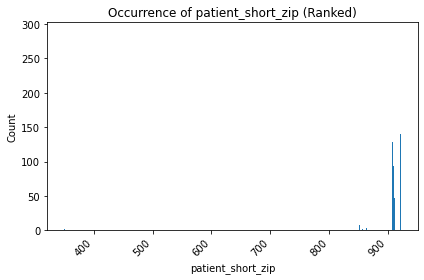

In [106]:
# Extract labels and values
labels = [item[0] for item in sorted_counts]
values = [item[1] for item in sorted_counts]

# Create the bar chart
plt.bar(labels, values)

# Labels and title 
plt.xlabel("patient_short_zip")
plt.ylabel("Count")
plt.title("Occurrence of patient_short_zip (Ranked)")

# Optional: Rotate x labels if they are long or overlapping
if len(labels) > 5:  
    plt.xticks(rotation=45, ha='right')  

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()

From the frequencies of the zip code, we found that most patients came from the following area:San Diego,Indio, Long Beach, Pasadena and so on. This result agrees with our previous result that most of the patients are from CA, so the top zip code are all from CA. We can know from the zip code that most of Ozempic users concentrate in  around souther Cal, greater LA area. The reason that Ozempic users concentrate in these areas may beacause these areas may have more healthcare infrastructure and better diagnosis. Also, peopel in these areas may tend to have greater health awareness and lead to more Ozempic users. To better understand theses geographical impacts on Ozempic user, we may need more researches.